<p style="text-align:center;"><span style="font-size:60px;"><span style="color:navy"><span style="font-family:cursive;"><span style="font-weight:1000">Hi Everybody 👋</span></span></span></span></p>

In [1]:
##### PIC

<div style="border-radius:10px; padding: 15px; background-color: #e3e6fa; text-align:left; font-size:120%">

<h4 align="left"><span style="font-weight:700; font-size:160%"><font color=#d10202>Description:</font></span></h4>


<a id="setup"></a>
<h1><p style="padding:15px;background-color:black ;margin:0;color:#ffffff;font-family:Chalkduster;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #32409c">Table Of Content</p></h1>

<a id="content"></a>    
<div style="border-radius:20px; padding: 15px; background-color: #e3e6fa; font-size:100%; text-align:left">

<h2><span style="text-align:center; font-weight:bolder; color:navy">Table of Contents:</span></h2>

 * **[Step 1 | Nessesary Libraries](#setup)**
    -  [1.1 | Import Libraries](#import)
    -  [1.2 | Library configurations](#lib_config)
 *  **[Step 2 | Data](#data)**
    -  [2.1 | Collecting Data](#load_data)
 *  **[Step 3 | Data Wrangling](#data_wrangling)**
    -  [3.1 | Missing Values](#missing)
    -  [3.2 | Plots and Outliers](#plots)
    -  [3.3 | Normalization](#normalize)
 *  **[Step 4 | PCA](#pca)**
    -  [4.1 | PCA and Incremental PCA](#pca2)
 *  **[Step 5 | Clustring Models](#ml)**
    -  [5.1 | Kmeans](#kmeans)
    -  [5.2 | KMeans Impleamentation](#kmeans_impl)
    -  [4.3 | SVC](#svc)
    -  [4.4 | DecisionTreeClassifier](#tree)
    -  [4.5 | KNeighborsClassifier](#knn)
    -  [4.6 | result](#result)
 *  **[Author](#author)**

<a id="setup"></a>
<h1><p style="padding:15px;background-color:black ;margin:0;color:#ffffff;font-family:Chalkduster;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #32409c">Step 1 | Nessasary Libraries</p></h1>

<a id="import"></a>
<h2><b><span style="color:#0266b7">Step 1.1 | </span><span style="color:#ff6200">Import Libraries</span></b></h2>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.cluster import KMeans, MiniBatchKMeans, MeanShift, SpectralClustering, DBSCAN, AffinityPropagation, estimate_bandwidth
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from kneed import KneeLocator

<a id="lib_config"></a>
<h2><b><span style="color:#0266b7">Step 1.2 | </span><span style="color:#ff6200">Library configurations</span></b></h2>

In [4]:
pd.options.mode.copy_on_write = True # Allow re-write on variable

sns.set_style('darkgrid') # Seaborn style

warnings.filterwarnings('ignore') # Ignore warnings


<a id="data"></a>
<h1><p style="padding:15px;background-color:black ;margin:0;color:#ffffff;font-family:Chalkduster;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #32409c">Step 2 | Data</p></h1>

<a id="load_data"></a>
<h2><b><span style="color:#0266b7">Step 2.1 | </span><span style="color:#ff6200">Load Data</span></b></h2>

In [5]:
data = pd.read_csv('Country_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
data.describe(include='all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000


<a id="data_wrangling"></a>
<h1><p style="padding:15px;background-color:black ;margin:0;color:#ffffff;font-family:Chalkduster;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #32409c">Step 3 | Data Wrangling </p></h1>

<a id="missing"></a>
<h2><b><span style="color:#0266b7">Step 3.1 | </span><span style="color:#ff6200"> Missing Values</span></b></h2>

In [7]:
data.isna().sum().sum()

0

<a id="plot"></a>
<h2><b><span style="color:#0266b7">Step 3.2 | </span><span style="color:#ff6200"> Plots and Outliers</span></b></h2>

In [8]:
colmns = data.columns
colmns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

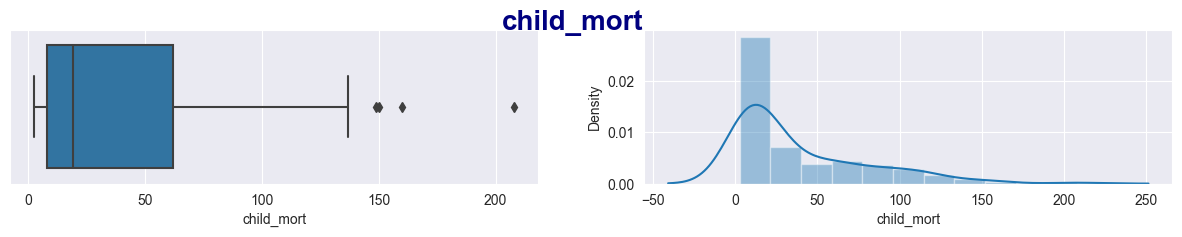

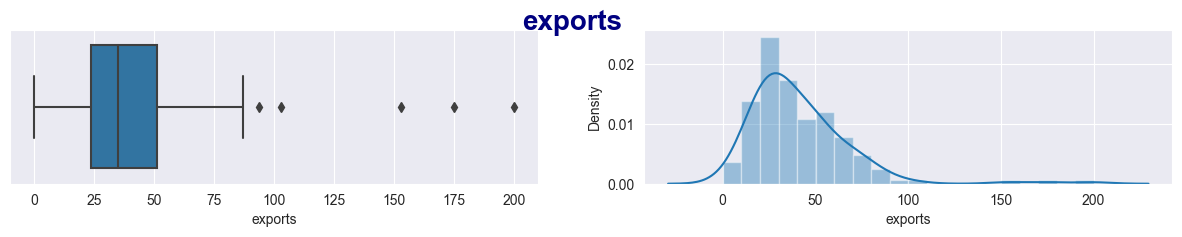

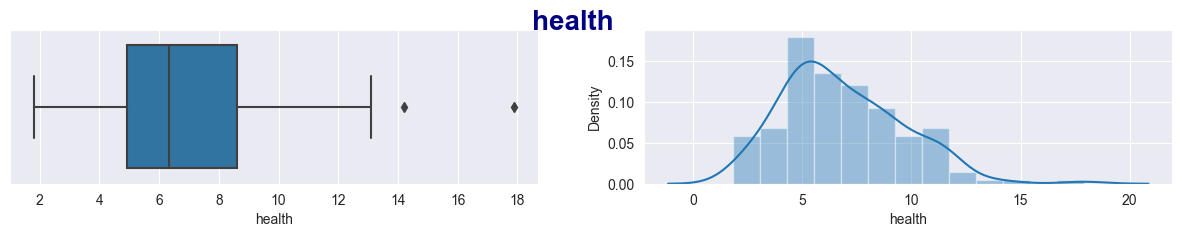

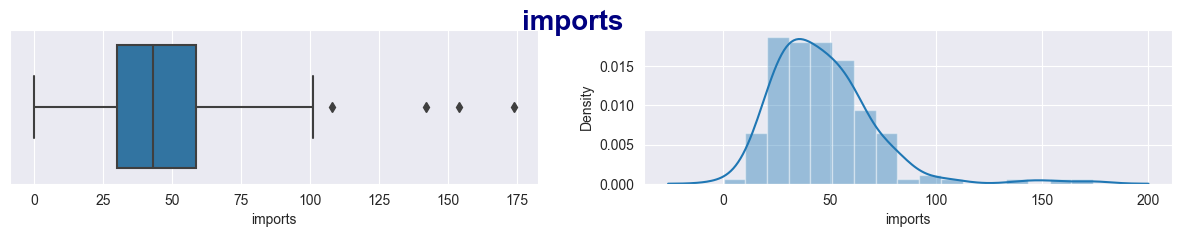

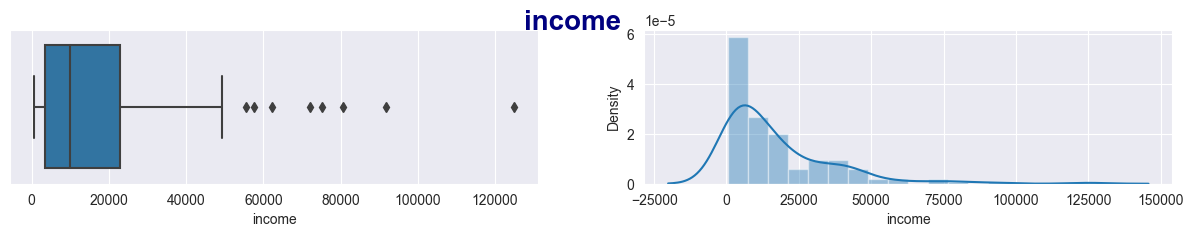

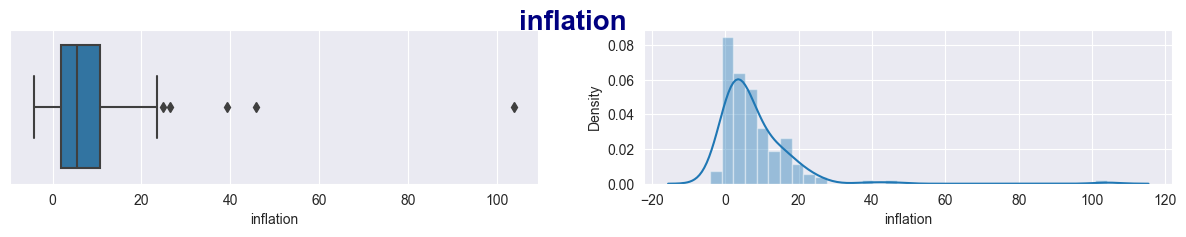

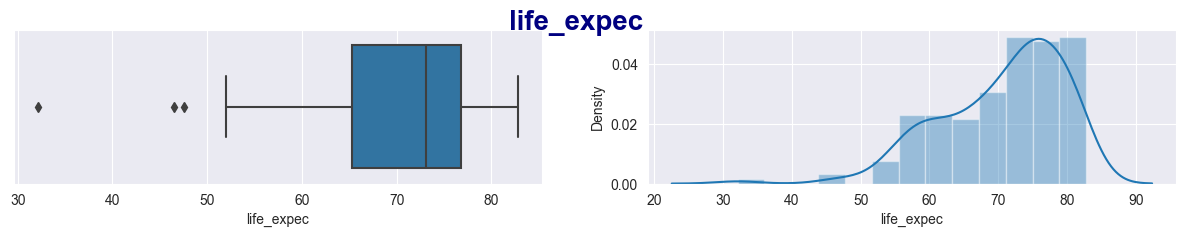

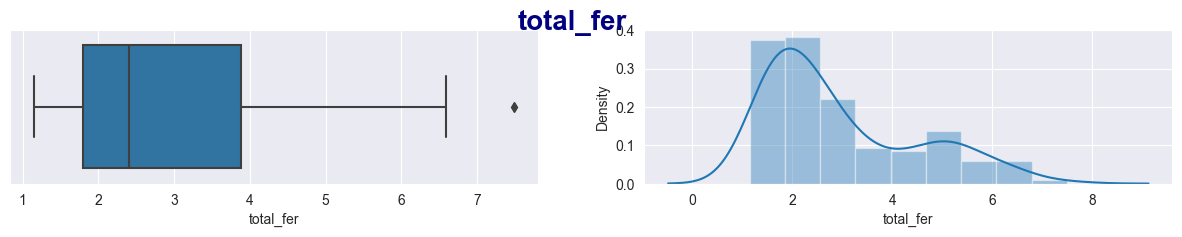

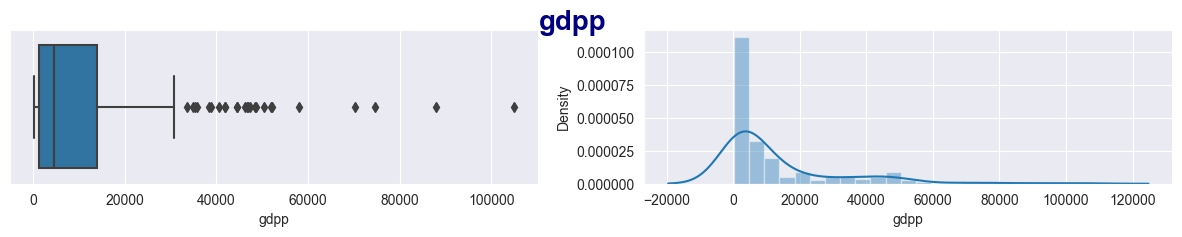

In [9]:
for i in range(1, 10) :
    fig, ax = plt.subplots(1, 2, figsize=(15, 2))
    plt.suptitle(colmns[i], fontsize=20, fontweight='bold', color='navy')
    # Left Plot
    sns.boxplot(x=colmns[i], data=data, ax=ax[0])
    # Right Plot
    sns.distplot(data[colmns[i]], ax=ax[1])

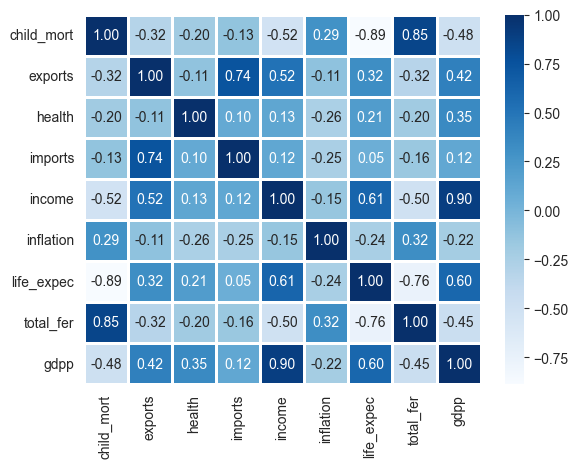

In [10]:
sns.heatmap(data=data.iloc[:, 1:].corr(), annot=True, fmt=".2f", linewidth=0.75, cmap="Blues")
plt.show()

<h3 style="font-weight:700">Most related features :</h3>
<ul><span style="color:green; font-weight:600">income | gdpp : 0.90</span></ul>
<ul><span style="color:red; font-weight:600">life_expect | child_mort : -0.89</span></ul>
<ul><span style="color:green; font-weight:600">total_fer | child_mort : 0.85</span></ul>

<a id="normalize"></a>
<h2><b><span style="color:#0266b7">Step 3.3 | </span><span style="color:#ff6200"> Normalization </span></b></h2>

In [11]:
country = data.country
data.drop(columns='country', inplace=True)
scaler = MinMaxScaler().fit_transform(data)
df_0 = pd.DataFrame(scaler, columns=data.columns)

<a id="pca"></a>
<h1><p style="padding:15px;background-color:black ;margin:0;color:#ffffff;font-family:Chalkduster;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #32409c">Step 4 | PCA </p></h1>

<a id="pca2"></a>
<h2><b><span style="color:#0266b7">Step 4.1 | </span><span style="color:#ff6200"> PCA and Incremental PCA </span></b></h2>

In [12]:
pca = PCA(n_components=9).fit(df_0)
exp = pca.explained_variance_ratio_
print(exp)

[0.55001227 0.13384784 0.12301053 0.09749047 0.03777964 0.03013659
 0.01190434 0.00887791 0.00694042]


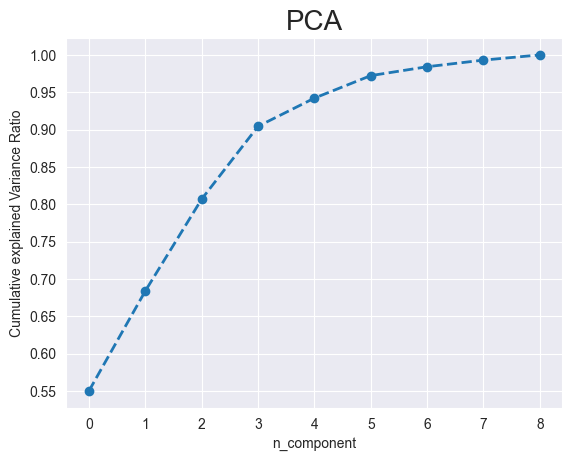

In [13]:
plt.plot(np.cumsum(exp), linewidth=2, marker = 'o', linestyle = '--')
plt.title("PCA", fontsize=20)
plt.xlabel('n_component')
plt.ylabel('Cumulative explained Variance Ratio')
plt.yticks(np.arange(0.55, 1.05, 0.05))
plt.show()

<h3 style="font-weight:600">For n_component=5 has about 97% of result</h3>

In [14]:
finla_pca = IncrementalPCA(n_components=5).fit_transform(df_0)

In [15]:
finla_pca.shape

(167, 5)

In [16]:
pc = np.transpose(finla_pca)

In [17]:
corrmat = np.corrcoef(pc)

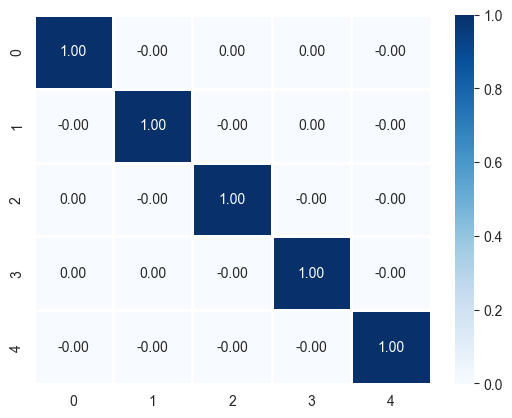

In [18]:
sns.heatmap(data=corrmat, annot=True, fmt=".2f", linewidth=0.75, cmap="Blues")
plt.show()

In [19]:
df = pd.DataFrame({
    'PC1':pc[0],
    'PC2':pc[1],
    'PC3':pc[2],
    'PC4':pc[3],
    'PC5':pc[4],
})
df

,PC1,PC2,PC3,PC4,PC5
0,0.599065,0.095506,0.157437,0.024382,0.042560
1,-0.158455,-0.212345,-0.063709,0.061067,-0.017134
2,-0.003661,-0.135842,-0.133938,-0.133376,0.092225
3,0.650272,0.276016,-0.143024,-0.155593,0.083921
4,-0.200684,-0.065162,-0.100418,0.037680,0.030574
...,...,...,...,...,...
162,0.160056,-0.030100,-0.121936,0.065807,0.007747
163,-0.061196,-0.169616,-0.058942,-0.245296,0.112279
164,-0.115510,-0.032083,-0.195224,0.232604,0.040592
165,0.332967,-0.019417,-0.030055,-0.104661,0.145588


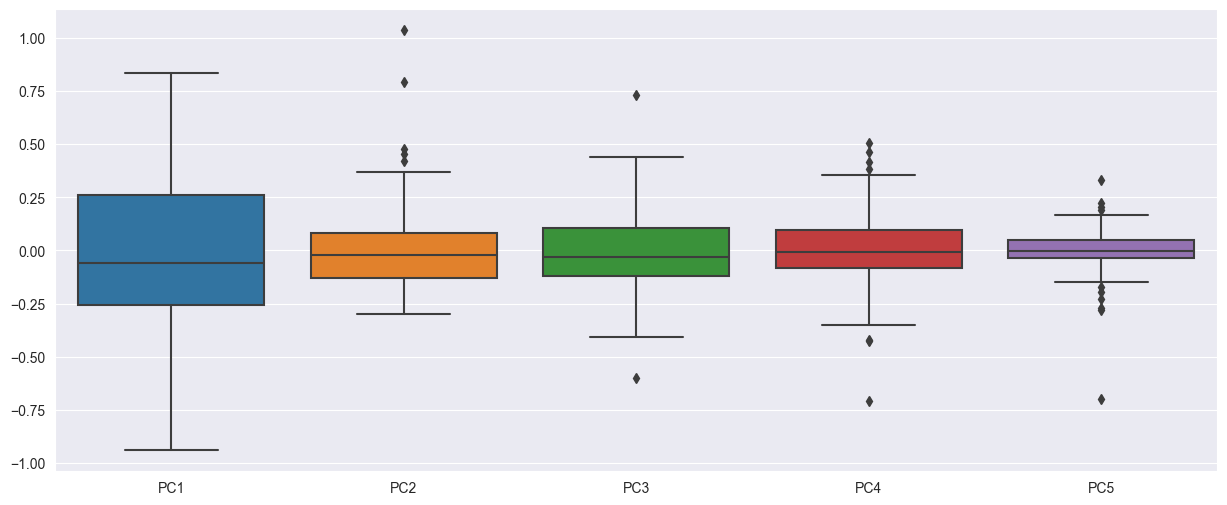

In [20]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(data=df)
plt.show()

<a id="ml"></a>
<h1><p style="padding:15px;background-color:black ;margin:0;color:#ffffff;font-family:Chalkduster;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #32409c">Step 5 | Clustring Models </p></h1>

<a id="kmeans"></a>
<h2><b><span style="color:#0266b7">Step 5.1 | </span><span style="color:#ff6200"> KMeans </span></b></h2>

In [24]:
kmeans_list = []
kmeans_sil_coef = []
kmeans_calinski_score = []
kmeans_calinski_score = []
kmeans_davies_score = []

for n in range(2, 10) :
    
    # main algorithm
    kmeans = KMeans(n_clusters=n).fit(df)
    kmeans_list.append(kmeans.inertia_)
    
    # Silhouette
    sil_score = silhouette_score(df, kmeans.labels_)
    kmeans_sil_coef.append(sil_score)
    
    # Calinski Harabasz Score
    calinski_score = calinski_harabasz_score(df, kmeans.labels_)
    kmeans_calinski_score.append(calinski_score)

    # Davies Bouldin Score
    davies_score = davies_bouldin_score(df, kmeans.labels_)
    kmeans_davies_score.append(davies_score)



k1 = KneeLocator(range(2, 10), kmeans_list, curve='convex', direction='decreasing')

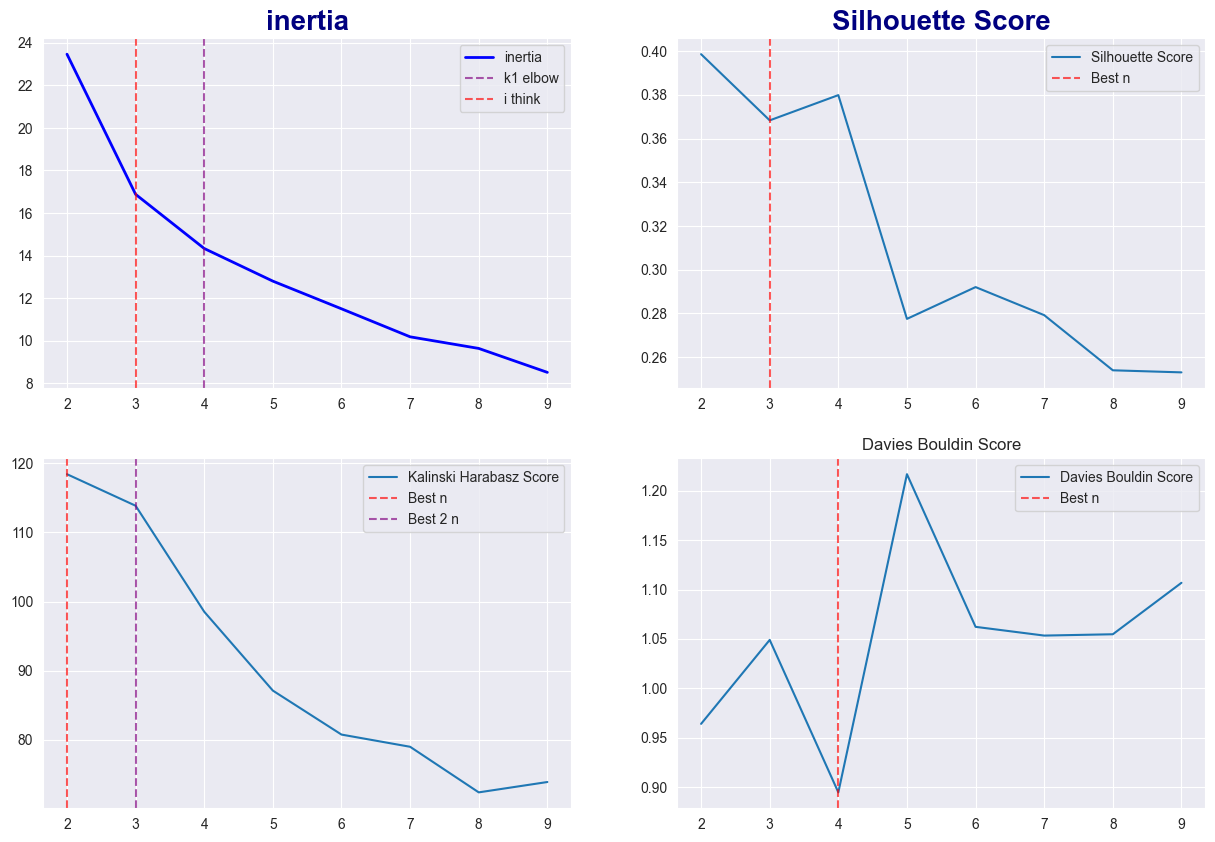

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
# Ax 1 :  inertia
ax[0, 0].plot(range(2, 10), kmeans_list, color='blue', label='inertia', linewidth=2)
ax[0, 0].axvline(x=k1.elbow, ls='--', label='k1 elbow', color='purple', alpha=0.65)
ax[0, 0].axvline(x=3, ls='--', label='i think', color='red', alpha=0.65)
ax[0, 0].set_title('inertia', fontsize=20, fontweight=600, color='navy')
ax[0, 0].legend()

# Ax 2 : Silhouette Score
ax[0, 1].plot(range(2, 10), kmeans_sil_coef, label='Silhouette Score')
ax[0, 1].set_title('Silhouette Score', fontsize=20, fontweight=600, color='navy')
ax[0, 1].axvline(x=3, ls='--', alpha=0.65, label='Best n', color='red')
ax[0, 1].legend()

# Ax 3 : Calinski Harabasz Score
ax[1, 0].plot(range(2, 10),  kmeans_calinski_score, label='Kalinski Harabasz Score')
ax[1, 0].axvline(x=2, ls='--', label='Best n', color='red', alpha=0.65)
ax[1, 0].axvline(x=3, ls='--', label='Best 2 n', color='purple', alpha=0.65)
ax[1, 0].legend()

# Ax 4 : Davies Bouldin Score
ax[1, 1].plot(range(2, 10), kmeans_davies_score, label='Davies Bouldin Score')
ax[1, 1].axvline(x=4, ls='--', alpha=0.65, label='Best n', color='red')
ax[1, 1].set_title('Davies Bouldin Score')
ax[1, 1].legend()


plt.show()

<h2> Base on above plots, best n_cluster for kmeans algorithm is 3 </h2>

<a id="kmeans_impl"></a>
<h2><b><span style="color:#0266b7">Step 5.1 | </span><span style="color:#ff6200"> KMeans Impleamentation</span></b></h2>

In [28]:
kmeans = KMeans(n_clusters=3).fit(df)

In [32]:
df.insert(0, 'country', country)
df['class'] = kmeans.labels_

In [33]:
df.head()

,country,PC1,PC2,PC3,PC4,PC5,class
0,Afghanistan,0.599065,0.095506,0.157437,0.024382,0.042560,0
1,Albania,-0.158455,-0.212345,-0.063709,0.061067,-0.017134,2
2,Algeria,-0.003661,-0.135842,-0.133938,-0.133376,0.092225,2
3,Angola,0.650272,0.276016,-0.143024,-0.155593,0.083921,0
4,Antigua and Barbuda,-0.200684,-0.065162,-0.100418,0.037680,0.030574,2


In [36]:
import plotly.express as px

In [40]:
fig = px.choropleth(df)
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260, title_y = 0.86)
fig.show(engine = 'kaleido')